In [5]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model

inspector_gadget = inspect(engine)


# reflect the tables

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [10]:
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column['name'])
    print()

measurement
id
station
date
prcp
tobs

station
id
station
name
latitude
longitude
elevation



In [11]:
query_measurement = """
                    SELECT
                        *
                    FROM
                        measurement
                    """

dfm = pd.read_sql(query_measurement, engine)#.set_index('id', drop=True)
dfm.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
query_station = """
                SELECT
                    *
                FROM
                    station
                """

dfs = pd.read_sql(query_station, engine)#.set_index('id', drop=True)
dfs


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.

query_max_date = """
                SELECT
                    max(date)
                FROM
                    measurement            
                """

dfmax_date = pd.read_sql(query_max_date, engine)
dfmax_date.head()


,max(date)
0,2017-08-23


In [30]:
query_min_date = """
                SELECT
                    min(date)
                FROM
                    measurement            
                """

dfmin_date = pd.read_sql(query_min_date, engine)
dfmin_date.head()

,min(date)
0,2010-01-01


In [14]:
mask = (dfm.date <= '2017-08-23') & (dfm.date > '2016-08-23')
dfm2 = dfm.loc[mask, ['date', 'prcp', 'station']]
dfm2.groupby('date').count()

,prcp,station
date,,
2016-08-24,6,7
2016-08-25,7,7
2016-08-26,6,6
2016-08-27,5,6
2016-08-28,6,6
...,...,...
2017-08-19,3,4
2017-08-20,2,3
2017-08-21,3,4


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date

query_prcp = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE date > '2016-08-23'
              AND date <= '2017-08-23'
        """

df_prcp = pd.read_sql(query_prcp, engine)#.set_index('date', drop=True)
df_prcp.head()



,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [16]:
df_prcp["date_formatted"] = pd.to_datetime(df_prcp.date)

In [17]:
len(df_prcp.index.values)

2223

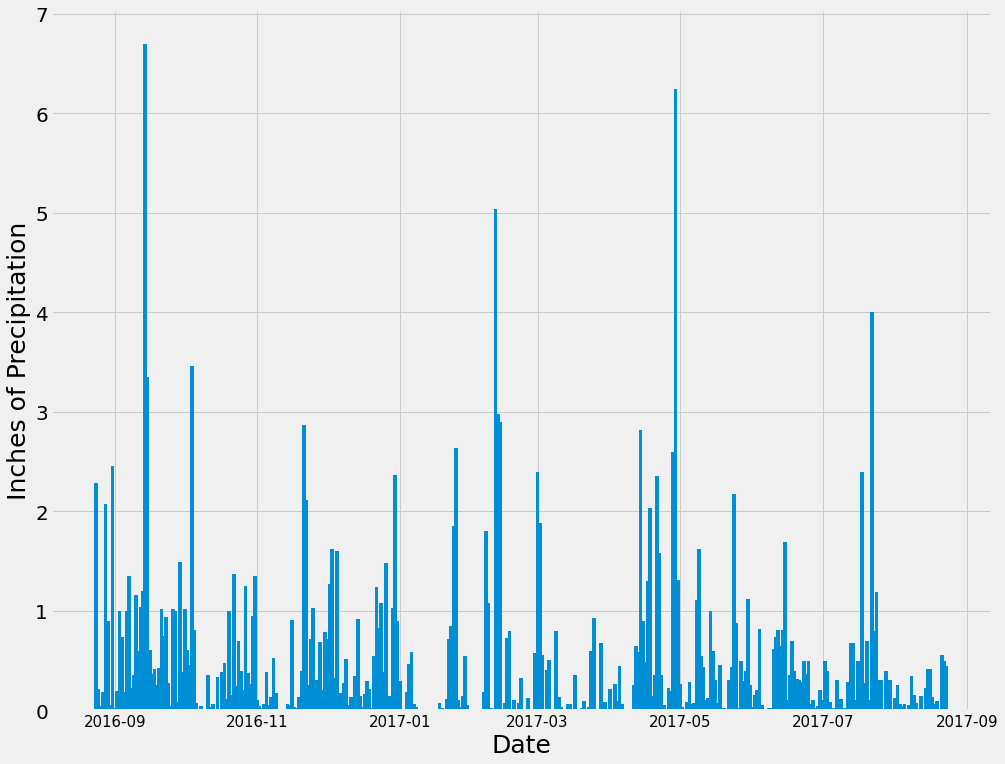

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data


#fig, axs = plt.subplots(figsize=(15, 12), constrained_layout=True)

x_values = df_prcp.date_formatted.values
y_values = df_prcp.prcp.values

plt.figure(figsize = (15,12))

myFmt = mdates.DateFormatter('%d')

plt.bar(x_values, y_values, width = 1.6)
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Inches of Precipitation", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)

plt.show()

We see that some dates in september, March, May, and August have very high precipitation values.

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df_prcp.prcp.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset

query_numberofstations = """
                            SELECT
                                DISTINCT station
                            FROM
                                station
                         """

df_numberofstations = pd.read_sql(query_numberofstations, engine)#.set_index('date', drop=True)
df_numberofstations


,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [21]:
len(df_numberofstations) #in station table

9

In [22]:
query_numberofstations_me = """
                            SELECT
                                DISTINCT station
                            FROM
                                station
                         """

df_numberofstations_me = pd.read_sql(query_numberofstations_me, engine)#.set_index('date', drop=True)
df_numberofstations_me

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

query_activestations =   """
                            SELECT
                                m.station,
                                s.name,
                                count(m.station) as num_of_stations
                            FROM
                                measurement m
                            JOIN
                                station s ON s.station = m.station
                            GROUP BY
                                m.station, 
                                s.name
                            ORDER BY
                                num_of_stations DESC
                         """

df_activestations = pd.read_sql(query_activestations, engine)#.set_index('date', drop=True)
df_activestations

,station,name,num_of_stations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [24]:
dfm.columns

Index(['id', 'station', 'date', 'prcp', 'tobs'], dtype='object')

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

query_temperatureextremes =   """
                                SELECT
                                    DISTINCT station,
                                    MAX(tobs) as max_temperature,
                                    MIN(tobs) as min_temperature,
                                    AVG(tobs) as avg_temperature
                                FROM
                                    measurement m
                                WHERE
                                    m.station = 'USC00519281'
                             """

df_temperatureextremes = pd.read_sql(query_temperatureextremes, engine)#.set_index('date', drop=True)
df_temperatureextremes


,station,max_temperature,min_temperature,avg_temperature
0,USC00519281,85.0,54.0,71.663781


In [37]:
start_date

'2015-03-08'

In [40]:
start_date = '2012-03-08'
query_trial =   f"""
                SELECT
                    station,
                    MAX(tobs) as max_temperature,
                    MIN(tobs) as min_temperature,
                    AVG(tobs) as avg_temperature
                FROM
                    measurement
                WHERE
                    date >= '{start_date}'
                GROUP BY
                    station
                """

df_trial = pd.read_sql(query_trial, engine)#.set_index('date', drop=True)
df_trial


,station,max_temperature,min_temperature,avg_temperature
0,USC00511918,86.0,53.0,71.769359
1,USC00513117,85.0,59.0,72.835404
2,USC00514830,85.0,63.0,76.010849
3,USC00516128,84.0,58.0,71.020529
4,USC00517948,87.0,59.0,75.102642
5,USC00518838,80.0,64.0,73.940299
6,USC00519281,85.0,54.0,71.807576
7,USC00519397,87.0,56.0,74.758308
8,USC00519523,85.0,56.0,74.889244


In [42]:
start_date = '2013-05-10'
end_date = '2014-05-10'
query_trial =   f"""
                SELECT
                    station,
                    MAX(tobs) as max_temperature,
                    MIN(tobs) as min_temperature,
                    AVG(tobs) as avg_temperature
                FROM
                    measurement
                WHERE
                    date >= '{start_date}'
                    AND date <= '{end_date}'
                GROUP BY
                    station
                """

df_trial = pd.read_sql(query_trial, engine)#.set_index('date', drop=True)
df_trial

,station,max_temperature,min_temperature,avg_temperature
0,USC00511918,86.0,57.0,71.582873
1,USC00513117,84.0,62.0,72.779006
2,USC00514830,82.0,65.0,75.110320
3,USC00516128,84.0,60.0,70.943114
4,USC00517948,82.0,60.0,74.352657
5,USC00518838,80.0,64.0,74.621622
6,USC00519281,81.0,57.0,70.896175
7,USC00519397,83.0,58.0,74.314208
8,USC00519523,82.0,58.0,73.716763


In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_temperature_most_active =  """
                                    SELECT
                                        m.date,
                                        m.tobs
                                    FROM
                                        measurement m
                                    WHERE
                                        m.station = 'USC00519281'
                                 """

df_temperature_most_active = pd.read_sql(query_temperature_most_active, engine)#.set_index('date', drop=True)
df_temperature_most_active["date_formatted"] = pd.to_datetime(df_temperature_most_active.date)
df_temperature_most_active

,date,tobs,date_formatted
0,2010-01-01,70.0,2010-01-01
1,2010-01-02,62.0,2010-01-02
2,2010-01-03,74.0,2010-01-03
3,2010-01-04,75.0,2010-01-04
4,2010-01-05,74.0,2010-01-05
...,...,...,...
2767,2017-08-14,77.0,2017-08-14
2768,2017-08-15,77.0,2017-08-15
2769,2017-08-16,76.0,2017-08-16
2770,2017-08-17,76.0,2017-08-17


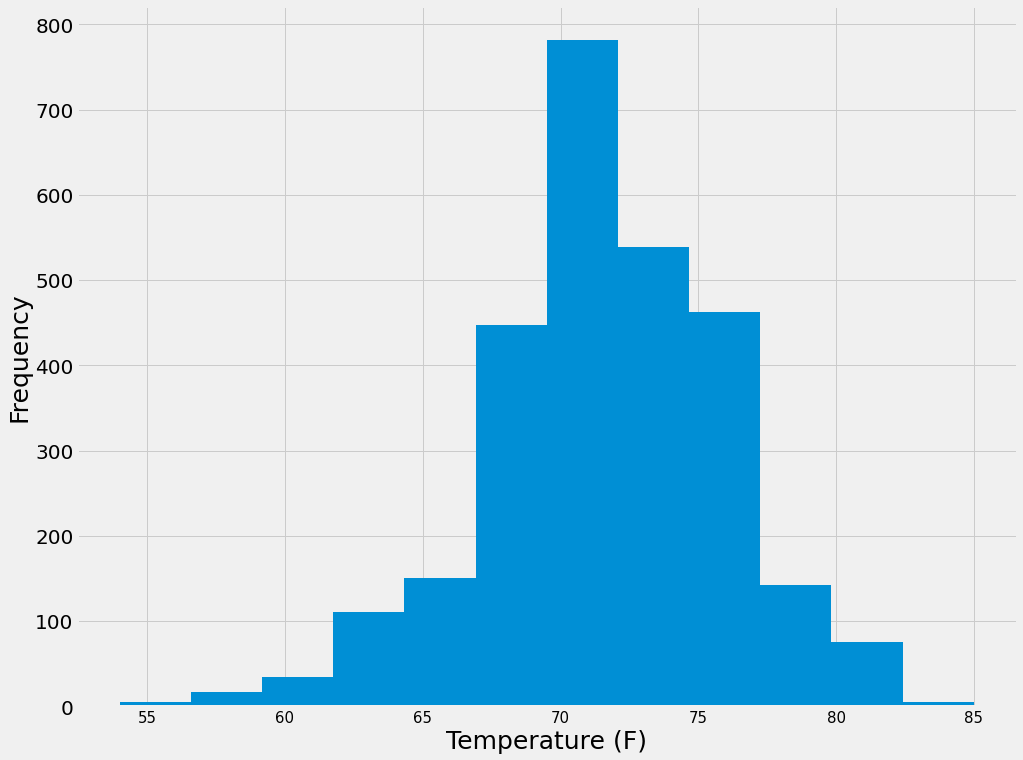

In [27]:
plt.figure(figsize=(15,12))

y_values = df_temperature_most_active.tobs.values

plt.hist(y_values, bins = 12)
plt.xlabel("Temperature (F)", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.show()

# Close session

In [128]:
# Close Session
# session.close()
# Not necessary as we are not using an ORM